In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split

In [2]:
english_words = ['word', 'the', 'of', 'and', 'to', 'a', 'in', 'for', 'is', 'on', 'that', 'by', 'this', 'with', 'i', 'you', 'it', 'not', 'or', 'be', 'are', 'from', 'at', 'as', 'your', 'all', 'have', 'new', 'more', 'an', 'was', 'we', 'will', 'home', 'can', 'us', 'about', 'if', 'page', 'my', 'has', 'search', 'free', 'but', 'our', 'one', 'other', 'do', 'no', 'information', 'time', 'they', 'site', 'he', 'up', 'may', 'what', 'which', 'their', 'news', 'out', 'use', 'any', 'there', 'see', 'only', 'so', 'his', 'when', 'contact', 'here', 'business', 'who', 'web', 'also', 'now', 'help', 'get', 'pm', 'view', 'online', 'c', 'e', 'first', 'am', 'been', 'would', 'how', 'were', 'me', 's', 'services', 'some', 'these', 'click', 'its', 'like', 'service', 'x', 'than', 'find', 'price', 'date', 'back', 'top', 'people', 'had', 'list', 'name', 'just', 'over', 'state', 'year', 'day', 'into', 'email', 'two', 'health', 'n', 'world', 're', 'next', 'used', 'go', 'b', 'work', 'last', 'most', 'products', 'music', 'buy', 'data', 'make', 'them', 'should', 'product', 'system', 'post', 'her', 'city', 't', 'add', 'policy', 'number', 'such', 'please', 'available', 'copyright', 'support', 'message', 'after', 'best', 'software', 'then', 'jan', 'good', 'video', 'well', 'd', 'where', 'info', 'rights', 'public', 'books', 'high', 'school', 'through', 'm', 'each', 'links', 'she', 'review', 'years', 'order', 'very', 'privacy', 'book', 'items', 'company', 'r', 'read', 'group', 'sex', 'need', 'many', 'user', 'said', 'de', 'does', 'set', 'under', 'general', 'research', 'university', 'january', 'mail', 'full', 'map', 'reviews', 'program', 'life', 'know', 'games', 'way', 'days', 'management', 'p', 'part', 'could', 'great', 'united', 'hotel', 'real', 'f', 'item', 'international', 'center', 'ebay', 'must', 'store', 'travel', 'comments', 'made', 'development', 'report', 'off', 'member', 'details', 'line', 'terms', 'before', 'hotels', 'did', 'send', 'right', 'type', 'because', 'local', 'those', 'using', 'results', 'office', 'education', 'national', 'car', 'design', 'take', 'posted', 'internet', 'address', 'community', 'within', 'states', 'area', 'want', 'phone', 'dvd', 'shipping', 'reserved', 'subject', 'between', 'forum', 'family', 'l', 'long', 'based', 'w', 'code', 'show', 'o', 'even', 'black', 'check', 'special', 'prices', 'website', 'index', 'being', 'women', 'much', 'sign', 'file', 'link', 'open', 'today', 'technology', 'south', 'case', 'project', 'same', 'pages', 'uk', 'version', 'section', 'own', 'found', 'sports', 'house', 'related', 'security', 'both', 'g', 'county', 'american', 'photo', 'game', 'members', 'power', 'while', 'care', 'network', 'down', 'computer', 'systems', 'three', 'total', 'place', 'end', 'following', 'download', 'h', 'him', 'without', 'per', 'access', 'think', 'north', 'resources', 'current', 'posts', 'big', 'media', 'law', 'control', 'water', 'history', 'pictures', 'size', 'art', 'personal', 'since', 'including', 'guide', 'shop', 'directory', 'board', 'location', 'change', 'white', 'text', 'small', 'rating', 'rate', 'government', 'children', 'during', 'usa', 'return', 'students', 'v', 'shopping', 'account', 'times', 'sites', 'level', 'digital', 'profile', 'previous', 'form', 'events', 'love', 'old', 'john', 'main', 'call', 'hours', 'image', 'department', 'title', 'description', 'non', 'k', 'y', 'insurance', 'another', 'why', 'shall', 'property', 'class', 'cd', 'still', 'money', 'quality', 'every', 'listing', 'content', 'country', 'private', 'little', 'visit', 'save', 'tools', 'low', 'reply', 'customer', 'december', 'compare', 'movies', 'include', 'college', 'value', 'article', 'york', 'man', 'card', 'jobs', 'provide', 'j', 'food', 'source', 'author', 'different', 'press', 'u', 'learn', 'sale', 'around', 'print', 'course', 'job', 'canada', 'process', 'teen', 'room', 'stock', 'training', 'too', 'credit', 'point', 'join', 'science', 'men', 'categories', 'advanced', 'west', 'sales', 'look', 'english', 'left', 'team', 'estate', 'box', 'conditions', 'select', 'windows', 'photos', 'gay', 'thread', 'week', 'category', 'note', 'live', 'large', 'gallery', 'table', 'register', 'however', 'june', 'october', 'november', 'market', 'library', 'really', 'action', 'start', 'series', 'model', 'features', 'air', 'industry', 'plan', 'human', 'provided', 'tv', 'yes', 'required', 'second', 'hot', 'accessories', 'cost', 'movie', 'forums', 'march', 'la', 'september', 'better', 'say', 'questions', 'july', 'yahoo', 'going', 'medical', 'test', 'friend', 'come', 'dec', 'server', 'pc', 'study', 'application', 'cart', 'staff', 'articles', 'san', 'feedback', 'again', 'play', 'looking', 'issues', 'april', 'never', 'users', 'complete', 'street', 'topic', 'comment', 'financial', 'things', 'working', 'against', 'standard', 'tax', 'person', 'below', 'mobile', 'less', 'got', 'blog', 'party', 'payment', 'equipment', 'login', 'student', 'let', 'programs', 'offers', 'legal', 'above', 'recent', 'park', 'stores', 'side', 'act', 'problem', 'red', 'give', 'memory', 'performance', 'social', 'q', 'august', 'quote', 'language', 'story', 'sell', 'options', 'experience', 'rates', 'create', 'key', 'body', 'young', 'america', 'important', 'field', 'few', 'east', 'paper', 'single', 'ii', 'age', 'activities', 'club', 'example', 'girls', 'additional', 'password', 'z', 'latest', 'something', 'road', 'gift', 'question', 'changes', 'night', 'ca', 'hard', 'texas', 'oct', 'pay', 'four', 'poker', 'status', 'browse', 'issue', 'range', 'building', 'seller', 'court', 'february', 'always', 'result', 'audio', 'light', 'write', 'war', 'nov', 'offer', 'blue', 'groups', 'al', 'easy', 'given', 'files', 'event', 'release', 'analysis', 'request', 'fax', 'china', 'making', 'picture', 'needs', 'possible', 'might', 'professional', 'yet', 'month', 'major', 'star', 'areas', 'future', 'space', 'committee', 'hand', 'sun', 'cards', 'problems', 'london', 'washington', 'meeting', 'rss', 'become', 'interest', 'id', 'child', 'keep', 'enter', 'california', 'porn', 'share', 'similar', 'garden', 'schools', 'million', 'added', 'reference', 'companies', 'listed', 'baby', 'learning', 'energy', 'run', 'delivery', 'net', 'popular', 'term', 'film', 'stories', 'put', 'computers', 'journal', 'reports', 'co', 'try', 'welcome', 'central', 'images', 'president', 'notice', 'god', 'original', 'head', 'radio', 'until', 'cell', 'color', 'self', 'council', 'away', 'includes', 'track', 'australia', 'discussion', 'archive', 'once', 'others', 'entertainment', 'agreement', 'format', 'least', 'society', 'months', 'log', 'safety', 'friends', 'sure', 'faq', 'trade', 'edition', 'cars', 'messages', 'marketing', 'tell', 'further', 'updated', 'association', 'able', 'having', 'provides', 'david', 'fun', 'already', 'green', 'studies', 'close', 'common', 'drive', 'specific', 'several', 'gold', 'feb', 'living', 'sep', 'collection', 'called', 'short', 'arts', 'lot', 'ask', 'display', 'limited', 'powered', 'solutions', 'means', 'director', 'daily', 'beach', 'past', 'natural', 'whether', 'due', 'et', 'electronics', 'five', 'upon', 'period', 'planning', 'database', 'says', 'official', 'weather', 'mar', 'land', 'average', 'done', 'technical', 'window', 'france', 'pro', 'region', 'island', 'record', 'direct', 'microsoft', 'conference', 'environment', 'records', 'st', 'district', 'calendar', 'costs', 'style', 'url', 'front', 'statement', 'update', 'parts', 'aug', 'ever', 'downloads', 'early', 'miles', 'sound', 'resource', 'present', 'applications', 'either', 'ago', 'document', 'works', 'material', 'bill', 'apr', 'written', 'talk', 'federal', 'hosting', 'rules', 'final', 'adult', 'tickets', 'thing', 'centre', 'requirements', 'via', 'cheap', 'nude', 'kids', 'finance', 'TRUE', 'minutes', 'else', 'mark', 'third', 'rock', 'gifts', 'europe', 'reading', 'topics', 'bad', 'individual', 'tips', 'plus', 'auto', 'cover', 'usually', 'edit', 'together', 'videos', 'percent', 'fast', 'function', 'fact', 'unit', 'getting', 'global', 'tech', 'meet', 'far', 'economic', 'en', 'player', 'projects', 'lyrics', 'often', 'subscribe', 'submit', 'germany', 'amount', 'watch', 'included', 'feel', 'though', 'bank', 'risk', 'thanks', 'everything', 'deals', 'various', 'words', 'linux', 'jul', 'production', 'commercial', 'james', 'weight', 'town', 'heart', 'advertising', 'received', 'choose', 'treatment', 'newsletter', 'archives', 'points', 'knowledge', 'magazine', 'error', 'camera', 'jun', 'girl', 'currently', 'construction', 'toys', 'registered', 'clear', 'golf', 'receive', 'domain', 'methods', 'chapter', 'makes', 'protection', 'policies', 'loan', 'wide', 'beauty', 'manager', 'india', 'position', 'taken', 'sort', 'listings', 'models', 'michael', 'known', 'half', 'cases', 'step', 'engineering', 'florida', 'simple', 'quick', 'none', 'wireless', 'license', 'paul', 'friday', 'lake', 'whole', 'annual', 'published', 'later', 'basic', 'sony', 'shows', 'corporate', 'google', 'church', 'method', 'purchase', 'customers', 'active', 'response', 'practice', 'hardware', 'figure', 'materials', 'fire', 'holiday', 'chat', 'enough', 'designed', 'along', 'among', 'death', 'writing', 'speed', 'html', 'countries', 'loss', 'face', 'brand', 'discount', 'higher', 'effects', 'created', 'remember', 'standards', 'oil', 'bit', 'yellow', 'political', 'increase', 'advertise', 'kingdom', 'base', 'near', 'environmental', 'thought', 'stuff', 'french', 'storage', 'oh', 'japan', 'doing', 'loans', 'shoes', 'entry', 'sight']

nigerian_words = ['dị ka', 'm', 'ya', 'na', 'enye', 'bụ', 'n’ihi na', 'ụfọdụ', 'ma ọ bụrụ na', 'ọrụ', 'ha', 'ịbụ', 'na', 'otu', 'nwere', 'a', 'si', 'site', 'na-ekpo ọkụ', 'okwu', 'ma', 'ihe', 'ụfọdụ', 'bụ', 'ya', 'ị', 'ma ọ bụ', 'nwere', 'na', 'nke', 'na-', 'na', 'a', 'na', 'anyị', 'ike', 'si', 'ọzọ', 'ndị', 'nke', 'eme', 'ha', 'oge', 'ma ọ bụrụ na', 'ekpe', 'otú', 'kwuru', 'ihe', 'ọ bụla', 'ịgwa', 'ke', 'set', 'atọ', 'chọrọ', 'ikuku', 'ọma', 'na-', 'igwu egwu', 'obere', 'njedebe', 'tinye', 'n’ụlọ', 'na-agụ', 'aka', 'ọdụ ụgbọ mmiri', 'nnukwu', 'asụpe', 'tinye', 'ọbụna', 'ala', 'ebe a', 'ana', 'nnukwu', 'elu', 'dị', 'na-eso', 'eme', 'ya mere', 'ịjụ', 'ndị ikom', 'mgbanwe', 'wee', 'ìhè', 'ụdị', 'anya', 'mkpa', 'ụlọ', 'foto', 'na-agbalị', 'anyị', 'ọzọ', 'anụmanụ', 'ebe', 'nne', 'ụwa', 'nso', 'ewu', 'onwe', 'ụwa', 'nna', 'ọ bụla', 'ọhụrụ', 'ọrụ', 'akụkụ', 'nara', 'nweta', 'ebe', 'mere', 'ndụ', 'ebe', 'mgbe', 'azụ', 'obere', 'naanị', 'gburugburu', 'nwoke', 'afọ', 'wee', 'izi', 'ọ bụla', 'mma', 'm', 'nye', 'anyị', 'n’okpuru', 'aha', 'nnọọ', 'site na', 'dị nnọọ', 'ụdị', 'ikpe', 'akwa', 'chere', 'na-ekwu', 'aka', 'ala', 'akara', 'iche', 'N’aka', 'kpatara', 'ukwuu', 'pụtara', 'n’ihu', 'nkwaghari', 'nri', 'nwa', 'ochie', 'oke', 'otu', 'ọ', 'niile', 'n’ebe ahụ', 'mgbe', 'elu', 'iji', 'gị', 'ụzọ', 'banyere', 'ọtụtụ', 'mgbe ahụ', 'ha', 'dee', 'ga-', 'dị ka', 'otú', 'ndị a', 'ya', 'ogologo', 'eme ka', 'ihe', 'ịhụ', 'ya', 'abụọ', 'nwere', 'anya', 'ọzọ', 'ụbọchị', 'ike', 'aga', 'bịa', 'mere', 'ọnụ ọgụgụ', 'ada', 'mba', 'kacha', 'ndị mmadụ', 'm', 'n’elu', 'mara', 'mmiri', 'karịa', 'oku', 'mbụ', 'onye', 'ike', 'ala', 'n’akụkụ', 'kemgbe', 'ugbu a', 'ịchọta', 'isi', 'eguzo', 'aka', 'peeji nke', 'kwesịrị', 'obodo', 'hụrụ', 'azịza', 'ụlọ akwụkwọ', 'na-eto', 'ọmụmụ', 'ka', 'ịmụta', 'osisi', 'mkpuchi', 'nri', 'anyanwụ', 'anọ', 'n’etiti', 'ala', 'na-', 'anya', 'mgbe', 'ikpeazụ', 'ka', 'chere', 'obodo', 'osisi', 'ịgafe', 'ugbo', 'ike', 'mmalite', 'ike', 'akụkọ', 'ikwo', 'anya', 'osimiri', 'ise', 'ekpe', 'oge', 'omume', 'emela', 'ebe', 'akuko', 'nso', 'abalị', 'n’ezie', 'ndụ', 'ole na ole', 'ugwu', 'akwụkwọ', 'ebu', 'were', 'sayensị', 'eri', 'ụlọ', 'enyi', 'malitere', 'echiche', 'azụ', 'ugwu', 'kwụsị', 'ozugbo', 'isi', 'hear', 'ịnyịnya', 'ịkpụ', 'hụ', 'na-ekiri', 'agba', 'ihu', 'osisi', 'isi', 'oghe', 'iyi', 'ọnụ', 'ọzọ', 'ọcha', 'ụmụ', 'na-amalite', 'wee', 'na-eje ije', 'atụ', 'mfe', 'akwụkwọ', 'otu', 'mgbe nile', 'music', 'ndị', 'ma', 'akara', 'mgbe', 'ozi', 'ruo mgbe', 'mile', 'osimiri', 'ụgbọ ala', 'ụkwụ', 'nlekọta', 'nke abụọ', 'ezuru', 'larịị', 'nwa agbọghọ', 'na-adị', 'nwa', 'njikere', 'n’elu', 'mgbe', 'acha ọbara ọbara', 'ndepụta', 'ezie', 'na-eche', 'okwu', 'nnụnụ', 'anya', 'ozu', 'nkịta', 'ezinụlọ', 'kpọmkwem', 'abụrụ', 'ahapụ', 'song', 'ịlele', 'ụzọ', 'ngwaahịa', 'ojii', 'obere', 'onuogugu', 'otu', 'ifufe', 'ajụjụ', 'eme', 'zuru oke', 'bi', 'Mo ti', 'rẹ', 'ti', 'o si', 'je', 'fun', 'lori', 'ni o wa', 'pẹlu', 'ti won', 'ki o wa ni', 'ni', 'ọkan', 'ni', 'yi', 'lati', 'nipa', 'gbona', 'ọrọ', 'ṣugbọn', 'kini', 'diẹ ninu awọn', 'ni', 'o', 'ti o', 'tabi', 'ní', 'awọn', 'ti awọn', 'to', 'ati ki o', 'kan', 'ni', 'a', 'le', 'jade', 'miiran', 'wọn', 'eyi ti', 'ṣe', 'wọn', 'akoko', 'ti o ba ti', 'yoo', 'Bawo', 'wi', 'ohun', 'kọọkan', 'sọ fun', 'wo ni', 'ṣeto', 'mẹta', 'fẹ', 'air', 'daradara', 'tun', 'mu ṣiṣẹ', 'kekere', 'opin', 'fi', 'ile', 'ka', 'ọwọ', 'ibudo', 'tobi', 'sipeli', 'fi', 'ani', 'ilẹ', 'nibi', 'gbọdọ', 'nla', 'ga', 'iru', 'tẹle', 'igbese', 'idi', 'beere', 'awọn ọkunrin', 'ayipada', 'si lọ', 'ina', 'Iru', 'pa', 'nilo', 'ile', 'aworan', 'gbiyanju', 'wa', 'lẹẹkansi', 'eranko', 'ojuami', 'iya', 'aye', 'sunmọ', 'kọ', 'ara', 'aiye', 'baba', 'eyikeyi', 'titun', 'iṣẹ', 'apakan', 'ya', 'gba', 'ibi', 'ṣe', 'gbe', 'ibi ti', 'lẹhin', 'pada', 'kekere', 'nikan', 'yika', 'eniyan', 'odun', 'wá', 'hàn', 'gbogbo', 'ti o dara', 'mi', 'fun', 'wa', 'labẹ', 'orukọ', 'gan', 'nipasẹ', 'o kan', 'fọọmu', 'gbolohun', 'nla', 'ro', 'sọ', 'Egba Mi O', 'kekere', 'ila', 'yato', 'Tan', 'fa', 'Elo', 'túmọ', 'ki o to', 'Gbe', 'ọtun', 'ọmọkunrin', 'ti atijọ', 'ju', 'kanna', 'o', 'gbogbo', 'nibẹ', 'Nigbawo', 'soke', 'lilo', 'rẹ', 'ọna', 'nipa', 'ọpọlọpọ', 'ki o si', 'wọn', 'kọ', 'ṣe', 'bi', 'ki', 'wọnyi', 'rẹ', 'gun', 'ṣe', 'ohun', 'wo', 'u', 'meji', 'ni o ni', 'wo', 'diẹ', 'ọjọ', 'le', 'lọ', 'wa', 'ṣe', 'nọmba', 'dun', 'ko si', 'julọ', 'eniyan', 'mi', 'lori', 'mọ', 'omi', 'ju', 'ipe', 'akọkọ', 'ti o', 'le', 'si isalẹ', 'ẹgbẹ', 'ti', 'bayi', 'ri', 'ori', 'duro', 'ti ara', 'iwe', 'yoo', 'orilẹ-ede', 'ri', 'idahun', 'ile-iwe', 'dagba', 'iwadi', 'si tun', 'ko', 'ohun ọgbìn', 'ideri', 'ounje', 'oorun', 'mẹrin', 'laarin', 'ipinle', 'pa', 'oju', 'ko', 'kẹhin', 'jẹ ki', 'ro', 'ilu', 'igi', 'kọjá', 'r’oko', 'lile', 'ibere', 'ki', 'itan', 'ri', 'jina', 'okun', 'fa', 'osi', 'pẹ', 'sure', 'se ko', 'nigba ti', 'tẹ', 'sunmọ', 'alẹ', 'gidi', 'aye', 'diẹ', 'ariwa', 'iwe', 'gbe', 'si mu', 'Imọ', 'jẹ', 'yara', 'ọrẹ', 'bẹrẹ', 'agutan', 'eja', 'oke', 'duro', 'lẹẹkan', 'mimọ', 'gbọ', 'ẹṣin', 'ge', 'daju', 'wo', 'awọ', 'oju', 'igi', 'akọkọ', 'ìmọ', 'dabi', 'papo', 'Itele', 'funfun', 'ọmọ', 'bẹrẹ', 'ni', 'rin', 'apẹẹrẹ', 'irorun', 'iwe', 'ẹgbẹ', 'nigbagbogbo', 'orin ti', 'awon ti', 'mejeeji', 'aami', 'igba', 'lẹta', 'titi', 'maili', 'odo', 'ayọkẹlẹ', 'ẹsẹ', 'itọju', 'keji', 'to', 'itele ti', 'omobirin', 'ibùgbé', 'odo', 'setan', 'loke', 'lailai', 'pupa', 'akojọ', 'tilẹ', 'lero', 'Ọrọ', 'eye', 'laipe', 'ara', 'aja', 'ebi', 'taara', 'duro', 'fi', 'song', 'wọn', 'ilekun', 'ọja', 'dudu', 'kukuru', 'numeral', 'kilasi', 'afẹfẹ', 'ibeere', 'ṣẹlẹ', 'pari', 'omi', 'agbegbe', 'kamar yadda', 'Ina', 'da', 'cewa,', 'ya', 'shi ne', 'domin', 'a kan', 'suna', 'tare da', 'suna', 'zama', 'a', 'daya', 'da', 'wannan', 'daga', 'by', 'zafi', 'kalma', 'amma', 'abin da', 'wasu', 'ne', 'shi', 'ka', 'ko', 'da', 'da', 'daga', 'to', 'da kuma', 'wani', 'a', 'muna', 'iya', 'out', 'sauran', 'suna', 'wanda', 'yi', 'da', 'lokaci', 'idan', 'so', 'yadda', 'ya ce', 'wani', 'kowace', 'gaya', 'ya aikata', 'sa', 'uku', 'so', 'air', 'da kyau', 'har ila yau,', 'wasa', 'small', 'karshen', 'sa', 'gida', 'karanta', 'hannu', 'tashar jiragen ruwa', 'babban', 'rubutawa', 'add', 'ko da', 'ƙasar', 'nan', 'tilas', 'big', 'high', 'irin', 'bin', 'yi', 'dalilin da ya sa', 'tambaye', 'mutane', 'canji', 'tafi', 'haske', 'irin', 'kashe', 'bukata', 'house', 'hoto', 'kokarin', 'mu', 'kuma', 'animal', 'aya', 'uwar', 'duniya', 'kusa da', 'gina', 'kai', 'duniya', 'uba', 'wani', 'new', 'aiki', 'part', 'kai', 'samu', 'wuri', 'ya yi', 'rayuwa', 'inda', 'bayan', 'baya', 'kadan', 'kawai', 'zagaye', 'mutum', 'shekara', 'ya zo', 'show', 'kowane', 'mai kyau', 'ni', 'ba', 'mu', 'karkashin', 'sunan', 'sosai', 'ta hanyar', 'kawai', 'form', 'magana', 'mai girma', 'tunani', 'ka ce', 'taimaka', 'low', 'line', 'bambanta', 'nuna', 'sabili', 'da yawa', 'nufi', 'kafin', 'tafi', 'dama', 'yaro', 'da haihuwa', 'ma', 'haka', 'sai ta', 'duk', 'akwai', 'a lokacin da', 'up', 'amfani', 'your', 'hanyar', 'game da', 'da yawa', 'to,', 'da su', 'rubuta', 'zai', 'kamar', 'don haka', 'wadannan', 'ta', 'yaushe', 'sa', 'abu', 'gani', 'shi', 'biyu', 'yana da', 'duba', 'more', 'rana', 'iya', 'je', 'zo', 'ya yi', 'lambar', 'sauti', 'babu', 'mafi', 'mutane', 'my', 'a kan', 'sani', 'ruwa', 'fiye da', 'kira', 'na farko', 'wanda', 'may', 'down', 'gefe', 'kasance', 'yanzu', 'samu', 'kai', 'tsaya', 'own', 'page', 'kammata', 'country', 'samu', 'amsar', 'makaranta', 'girma', 'study', 'har yanzu', 'koyi', 'shuka', 'cover', 'abinci', 'rãnã', 'hudu', 'tsakanin', 'jihar', 'ci gaba', 'ido', 'taba', 'na karshe', 'bari', 'tsammani', 'city', 'itacen', 'kuros', 'farm', 'wuya', 'farko', 'cikakken mulki', 'story', 'saw', 'far', 'tẽku', 'zana', 'bar', 'marigayi', 'ran', 'kar ka', 'yayin da', 'latsa', 'close', 'dare', 'real', 'rayuwa', '’yan', 'north', 'littafi', 'kawo', 'ya ɗauki', 'kimiyya', 'ku ci', 'dakin', 'aboki', 'ya fara', 'ra’ayin', 'kifi', 'dutse', 'daina', 'sau ɗaya', 'tushe', 'ji', 'doki', 'yanke', 'tabbata', 'watch', 'launi', 'face', 'wood', 'main', 'open', 'ze', 'tare', 'na gaba', 'white', 'yara', 'za a fara', 'samu', 'tafiya', 'misali', '’yanci', 'takarda', 'tara', 'ko da yaushe', 'music', 'wadanda', 'duka', 'mark', 'sau da yawa', 'wasika', 'har sai', 'mile', 'kogin', 'car', 'feet', 'kula', 'na biyu', 'isa', 'sarari', 'girl', 'saba', 'matasa', 'shirye', 'a sama', 'taba', 'ja', 'list', 'ko da yake', 'ji', 'talk', 'tsuntsu', 'da ewa ba', 'jiki', 'kare', 'iyali', 'kai tsaye', 'matsayi', 'bar', 'song', 'auna', 'kofa', 'samfur', 'black', 'short', 'adadi', 'class', 'iska', 'tambaya', 'faru', 'agbegbe']

In [3]:
# Combine and create labels
words = english_words + nigerian_words
labels = [0] * len(english_words) + [1] * len(nigerian_words)



# English words = 0
# Nigerian words = 1

In [4]:
print(labels[:10])
print(labels[-10:])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [5]:
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(words)
sequences = tokenizer.texts_to_sequences(words)
max_len = max(len(x) for x in sequences)
word_index = tokenizer.word_index


In [6]:
print(sequences)

[[19, 5, 6, 11], [7, 16, 2], [5, 22], [1, 4, 11], [7, 5], [1], [3, 4], [22, 5, 6], [3, 8], [5, 4], [7, 16, 1, 7], [17, 18], [7, 16, 3, 8], [19, 3, 7, 16], [3], [18, 5, 10], [3, 7], [4, 5, 7], [5, 6], [17, 2], [1, 6, 2], [22, 6, 5, 12], [1, 7], [1, 8], [18, 5, 10, 6], [1, 9, 9], [16, 1, 25, 2], [4, 2, 19], [12, 5, 6, 2], [1, 4], [19, 1, 8], [19, 2], [19, 3, 9, 9], [16, 5, 12, 2], [13, 1, 4], [10, 8], [1, 17, 5, 10, 7], [3, 22], [20, 1, 15, 2], [12, 18], [16, 1, 8], [8, 2, 1, 6, 13, 16], [22, 6, 2, 2], [17, 10, 7], [5, 10, 6], [5, 4, 2], [5, 7, 16, 2, 6], [11, 5], [4, 5], [3, 4, 22, 5, 6, 12, 1, 7, 3, 5, 4], [7, 3, 12, 2], [7, 16, 2, 18], [8, 3, 7, 2], [16, 2], [10, 20], [12, 1, 18], [19, 16, 1, 7], [19, 16, 3, 13, 16], [7, 16, 2, 3, 6], [4, 2, 19, 8], [5, 10, 7], [10, 8, 2], [1, 4, 18], [7, 16, 2, 6, 2], [8, 2, 2], [5, 4, 9, 18], [8, 5], [16, 3, 8], [19, 16, 2, 4], [13, 5, 4, 7, 1, 13, 7], [16, 2, 6, 2], [17, 10, 8, 3, 4, 2, 8, 8], [19, 16, 5], [19, 2, 17], [1, 9, 8, 5], [4, 5, 19], [16

In [7]:
print(tokenizer.sequences_to_texts(sequences))

['w o r d', 't h e', 'o f', 'a n d', 't o', 'a', 'i n', 'f o r', 'i s', 'o n', 't h a t', 'b y', 't h i s', 'w i t h', 'i', 'y o u', 'i t', 'n o t', 'o r', 'b e', 'a r e', 'f r o m', 'a t', 'a s', 'y o u r', 'a l l', 'h a v e', 'n e w', 'm o r e', 'a n', 'w a s', 'w e', 'w i l l', 'h o m e', 'c a n', 'u s', 'a b o u t', 'i f', 'p a g e', 'm y', 'h a s', 's e a r c h', 'f r e e', 'b u t', 'o u r', 'o n e', 'o t h e r', 'd o', 'n o', 'i n f o r m a t i o n', 't i m e', 't h e y', 's i t e', 'h e', 'u p', 'm a y', 'w h a t', 'w h i c h', 't h e i r', 'n e w s', 'o u t', 'u s e', 'a n y', 't h e r e', 's e e', 'o n l y', 's o', 'h i s', 'w h e n', 'c o n t a c t', 'h e r e', 'b u s i n e s s', 'w h o', 'w e b', 'a l s o', 'n o w', 'h e l p', 'g e t', 'p m', 'v i e w', 'o n l i n e', 'c', 'e', 'f i r s t', 'a m', 'b e e n', 'w o u l d', 'h o w', 'w e r e', 'm e', 's', 's e r v i c e s', 's o m e', 't h e s e', 'c l i c k', 'i t s', 'l i k e', 's e r v i c e', 'x', 't h a n', 'f i n d', 'p r

In [8]:
data = pad_sequences(sequences, maxlen=max_len)
print(data[0])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 19  5  6 11]


In [9]:
data = np.array(data)
labels = np.array(labels)

# print(data)
# print(labels)

print(data[99])
print(data[72])
print(data[543])
print(data[1345])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  7 16  1  4]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 19 16  5]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 2 7]
[ 0  0  0  0  0  0  0  0  0 14  3 21  5 21 19  1 21  4  3]


In [10]:
print(len(tokenizer.word_index) )
print(max_len)

47
19


In [13]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (1601, 19)
Test data shape: (401, 19)


In [21]:
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid'),
    # Dropout(0.15)
])

In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(data, labels, epochs=25, batch_size=32, validation_split=0.2)

Epoch 1/25


51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6416 - loss: 0.6480 - val_accuracy: 0.0000e+00 - val_loss: 0.9032
Epoch 2/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7330 - loss: 0.4356 - val_accuracy: 0.5786 - val_loss: 1.2649
Epoch 3/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9249 - loss: 0.3093 - val_accuracy: 0.5362 - val_loss: 1.6808
Epoch 4/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9123 - loss: 0.2170 - val_accuracy: 0.6085 - val_loss: 1.5497
Epoch 5/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9364 - loss: 0.1773 - val_accuracy: 0.7332 - val_loss: 1.1140
Epoch 6/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9380 - loss: 0.1577 - val_accuracy: 0.5561 - val_loss: 1.7069
Epoch 7/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9401 - loss: 0.1510 - val_accuracy: 0.7406 - val_loss: 1.0922
Epoch 8/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9456 - loss: 0.1337 - val_accuracy: 0.6608 - val_loss: 1.3791

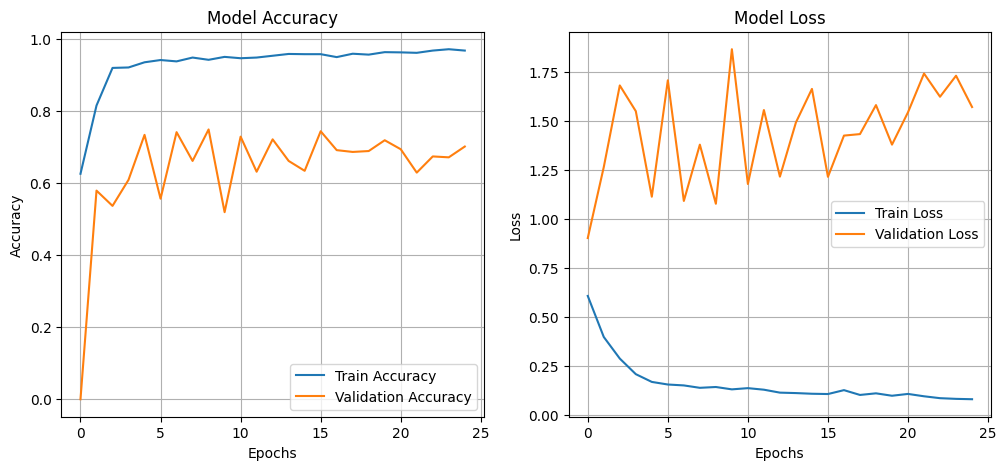

In [23]:
# Plot learning curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


# Plot learning curves
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
new_words = ['plaintiff', 'naija', 'cue', 'bẹẹni', 'harvest', 'oyibo', 'Sunana']
new_labels = np.array([0, 0, 0, 1, 0, 1, 1])

new_sequences = tokenizer.texts_to_sequences(new_words)
new_data = pad_sequences(new_sequences, maxlen=max_len)



In [18]:
# Predicting with the model
predictions = model.predict(new_data)

predicted_classes = (predictions > 0.5).astype(int)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


In [19]:
np.set_printoptions(precision=6, suppress=True)
print("Predictions:", predictions)
print("Predicted Classes:", predicted_classes)

Predictions: [[0.000274]
 [0.972131]
 [0.776323]
 [0.998702]
 [0.000033]
 [0.969963]
 [0.020676]]
Predicted Classes: [[0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]]


In [20]:
true_labels = [0, 0, 0, 1, 0, 1, 1]
accuracy = np.mean(predicted_classes.flatten() == true_labels)
print(f"Accuracy on new data: {accuracy}")

Accuracy on new data: 0.5714285714285714
